# Neural Network Traning

In [1]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook

In [2]:
dataset = pd.read_csv('extracted_data.csv')
dataset

,HR,SDNN,Pnn50,RMSSD,label
0,76.581161,0.169376,32.608696,0.292701,1
1,48.515809,0.102410,20.000000,0.163183,1
2,55.448202,0.147068,23.529412,0.250510,1
3,72.142741,0.189687,16.867470,0.149683,1
4,56.433247,0.211408,31.343284,0.300328,1
...,...,...,...,...,...
79,69.100392,0.019580,0.000000,0.013988,0
80,78.852889,0.028973,5.128205,0.026071,0
81,72.664320,0.024836,1.388889,0.018414,0
82,75.793491,0.021232,1.351351,0.022980,0


# Kuantitasi

## SDNN

In [44]:
plt.figure()
plt.scatter(dataset['Pnn50'],dataset['label'],c=dataset['label'])
plt.xlabel('Pnn50')
plt.ylabel('Label/Kelas')
plt.title('1 Fitur, Pnn50')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, '1 Fitur, Pnn50')

In [4]:
data_sdnn = dataset[['RMSSD','label']]
data_sdnn

,RMSSD,label
0,0.292701,1
1,0.163183,1
2,0.250510,1
3,0.149683,1
4,0.300328,1
...,...,...
79,0.013988,0
80,0.026071,0
81,0.018414,0
82,0.022980,0


In [5]:
sdnn_0 = data_sdnn[data_sdnn['label'] == 1]
sdnn_0['RMSSD'].describe()

count    46.000000
mean      0.238370
std       0.118878
min       0.045745
25%       0.164069
50%       0.203269
75%       0.298421
max       0.569726
Name: RMSSD, dtype: float64

<IPython.core.display.Javascript object>


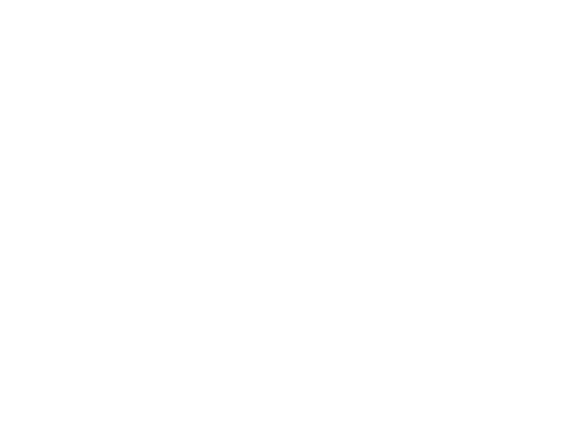

Text(0.5, 1.0, 'Boxplot RMSSD Kelas 1')

In [6]:
plt.figure()
sns.boxplot(x ='RMSSD', data= sdnn_0)
plt.title('Boxplot RMSSD Kelas 1')

<IPython.core.display.Javascript object>


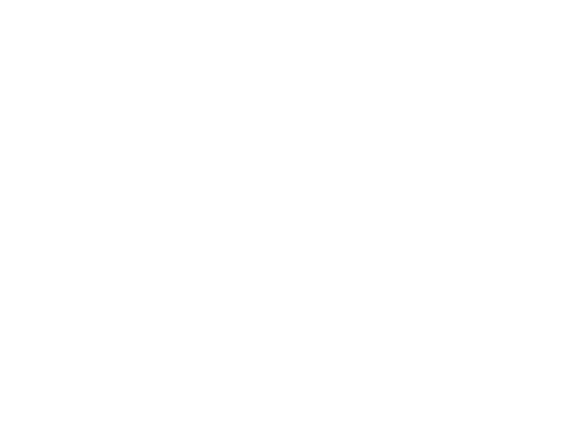

Text(0.5, 1.0, '1 Fitur, SDNN')

In [7]:
plt.figure()
plt.scatter(dataset['SDNN'],dataset['label'])
plt.xlabel('SDNN')
plt.ylabel('Label/Kelas')
plt.title('1 Fitur, SDNN')

## Pnn50

<IPython.core.display.Javascript object>


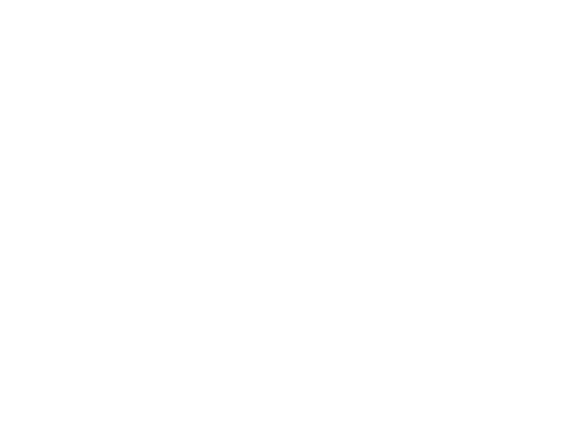

Text(0.5, 1.0, '1 dimensi, PNN50')

In [8]:
plt.figure()
plt.scatter(dataset['Pnn50'],dataset['label'])
plt.xlabel('PNN50')
plt.ylabel('Label/Kelas')
plt.title('1 dimensi, PNN50')

## RMSSD

<IPython.core.display.Javascript object>


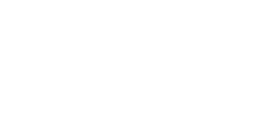

<IPython.core.display.Javascript object>


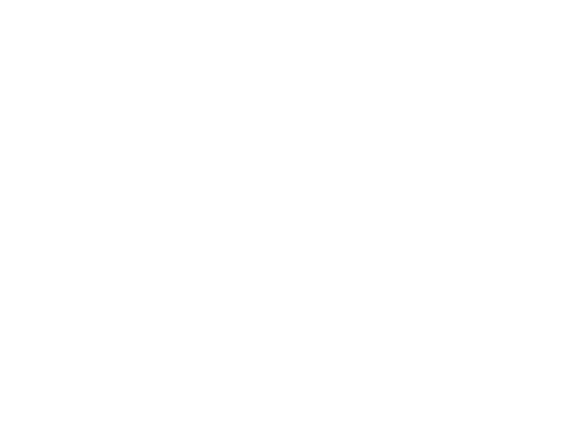

Text(0.5, 1.0, '1 dimensi, RMSSD')

In [9]:
plt.figure()
%matplotlib notebook
plt.scatter(dataset['RMSSD'],dataset['label'])
plt.xlabel('RMSSD')
plt.ylabel('Label/Kelas')
plt.title('1 dimensi, RMSSD')

## MHR

<IPython.core.display.Javascript object>


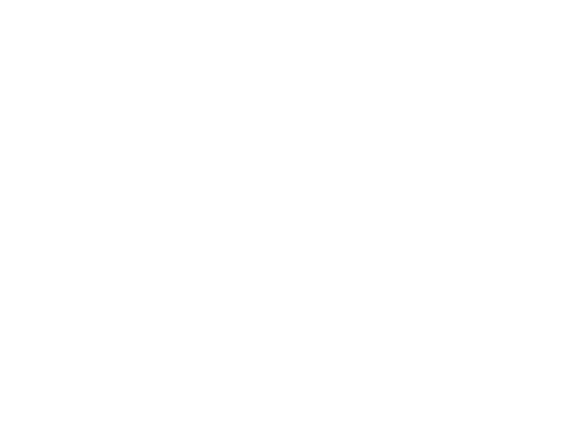

Text(0.5, 1.0, '1 dimensi, MHR')

In [10]:
plt.figure()
plt.scatter(dataset['HR'],dataset['label'])
plt.xlabel('MHR')
plt.ylabel('Label/Kelas')
plt.title('1 dimensi, MHR')

<IPython.core.display.Javascript object>


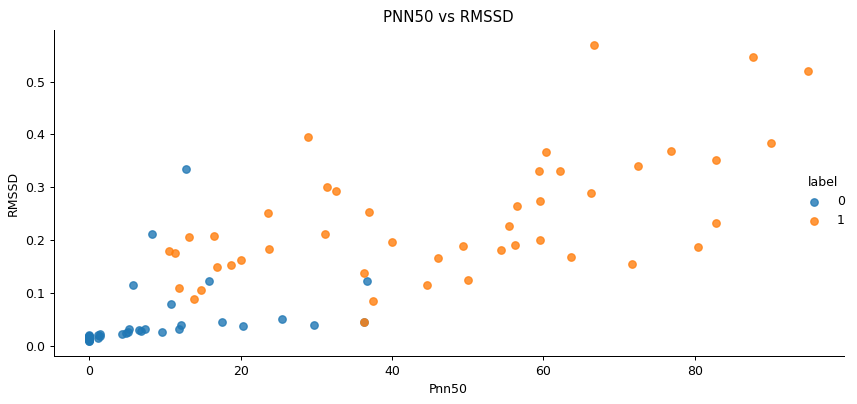

In [11]:
%matplotlib notebook
import seaborn as sns
sns.lmplot(x ='Pnn50', # Horizontal axis
           y ='RMSSD', # Vertical axis
           hue = 'label',
           data = dataset, # Data source
           fit_reg = False, # Don't fix a regression line
           aspect = 2 ) # size and dimension
plt.title('PNN50 vs RMSSD')
plt.tight_layout()

<IPython.core.display.Javascript object>


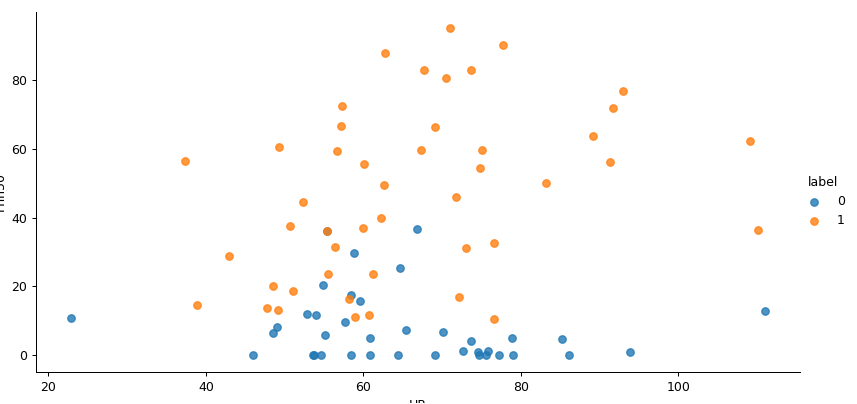

In [12]:
import seaborn as sns
sns.lmplot(x ='HR', # Horizontal axis
           y ='Pnn50', # Vertical axis
           hue = 'label',
           data = dataset, # Data source
           fit_reg = False, # Don't fix a regression line
           aspect = 2 ) # size and dimension

<IPython.core.display.Javascript object>


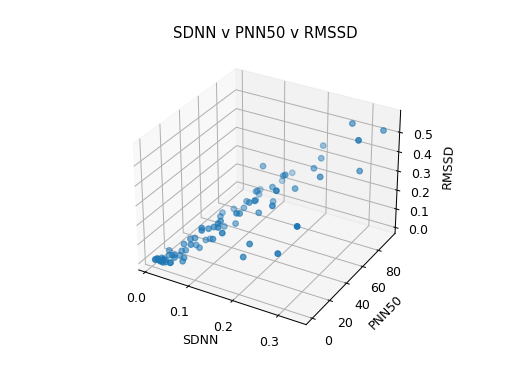

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = dataset['SDNN']
y = dataset['Pnn50']
z = dataset['RMSSD']

ax.set_xlabel("SDNN")
ax.set_ylabel("PNN50")
ax.set_zlabel("RMSSD")
ax.set_title('SDNN v PNN50 v RMSSD')
ax.scatter(x, y, z)

plt.show()

In [20]:
feature_set = dataset.drop(['HR','SDNN','label'],axis=1,inplace=False)
feature_set.head(5)

,Pnn50,RMSSD
0,32.608696,0.292701
1,20.000000,0.163183
2,23.529412,0.250510
3,16.867470,0.149683
4,31.343284,0.300328


In [21]:
target = pd.DataFrame(dataset['label'])
target.head(5)

,label
0,1
1,1
2,1
3,1
4,1


In [22]:
#plt.scatter(feature_set,target)

In [23]:
x_train, x_test, y_train, y_test= train_test_split(feature_set, target, test_size=0.33)

In [24]:
x_train.shape

(56, 2)

In [25]:
x_test.shape

(28, 2)

In [26]:
y_test.shape

(28, 1)

In [27]:
import time
start_time = time.time()


counter = 0
akurasitotal =0
for i in range(0,100):
    mlp = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', max_iter=100000)
    mlp.fit(x_train,y_train.values.ravel())
    pred=mlp.predict(x_test)
    akurasi=mlp.score(x_test,y_test)*100
    print(confusion_matrix(y_test, pred))
    print(f"akurasi NSR vs Arrythmia: {akurasi:0.2f} %")
    counter+=1
    akurasitotal += akurasi
akurasirata= akurasitotal/counter
print()
print(f'akurasi rata2 NSR vs Arrythmia: {akurasirata:0.2f}%')
print(f'{(time.time() - start_time):.2f} detik')

[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 0 16]]
akurasi NSR vs Arrythmia: 96.43 %
[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 0 16]]
akurasi NSR vs Arrythmia: 96.43 %
[[11  1]
 [ 0 16]]
akurasi NSR vs Arrythmia: 96.43 %
[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 0 16]]
akurasi NSR vs Arrythmia: 96.43 %
[[11  1]
 [ 0 16]]
akurasi NSR vs Arrythmia: 96.43 %
[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 0 16]]
akurasi NSR vs Arrythmia: 96.43 %
[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 1 15]]
akurasi NSR vs Arrythmia: 92.86 %
[[11  1]
 [ 0 16]]
akurasi NSR vs Arrythmia: 9

## Test Data

In [29]:
input_pnn50 = 9000
input_rmssd = 2000
pred = mlp.predict([[input_pnn50,input_rmssd]])
pred_prob = mlp.predict_proba([[input_pnn50,input_rmssd]])[0][0]
if pred == [0]:
    print(f'Normal Sinus Rythm Detected with probability: {pred_prob:.2f}')
else:
    print(f'Arrythmia Detected with probability {pred_prob:.2f} ')

Arrythmia Detected with probability 0.01 


## NSR vs PVC

In [19]:
dropped_af = dataset[(dataset['label'] != 'AF') ]

In [20]:
import seaborn as sns
sns.lmplot(x ='Pnn20', # Horizontal axis
           y= 'Pnn50', # Vertical axis
           hue = 'label',
           data = dropped_af, # Data source
           fit_reg = False, # Don't fix a regression line
           aspect = 2 ) # size and dimension

KeyError: "['Pnn20'] not in index"

In [ ]:
x=np.array(dropped_af.drop(['label','HR','SDNN','RMSSD','label','dataset','Unnamed: 7','Unnamed: 8'], axis=1))
y=np.array(dropped_af['label'])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3)

In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(2,2), activation='relu', solver='adam', max_iter=10000)
mlp.fit(x_train,y_train)
pred=mlp.predict(x_test)
akurasi=mlp.score(x_test,y_test)*100
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print(f"akurasi NSR vs PVC: {akurasi:0.2f} %")

C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.46      1.00      0.63        13

    accuracy                           0.46        28
   macro avg       0.23      0.50      0.32        28
weighted avg       0.22      0.46      0.29        28

[[ 0 15]
 [ 0 13]]
akurasi NSR vs PVC: 46.43 %


C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
counter = 0
akurasitotal =0
for i in range(0,10):
    mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=10000)
    mlp.fit(x_train,y_train)
    pred=mlp.predict(x_test)
    akurasi=mlp.score(x_test,y_test)*100
    print(f"akurasi NSR vs AF: {akurasi:0.2f} %")
    counter+=1
    akurasitotal += akurasi
akurasirata= akurasitotal/counter
print()
print(f'akurasi rata2 NSR vs PVC: {akurasirata:0.2f}%')

C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


akurasi NSR vs AF: 92.86 %
akurasi NSR vs AF: 89.29 %


C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


akurasi NSR vs AF: 92.86 %


C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


akurasi NSR vs AF: 92.86 %
akurasi NSR vs AF: 89.29 %


C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


akurasi NSR vs AF: 82.14 %


C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


akurasi NSR vs AF: 85.71 %


C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


akurasi NSR vs AF: 85.71 %


C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


akurasi NSR vs AF: 92.86 %


C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


akurasi NSR vs AF: 89.29 %

akurasi rata2 NSR vs PVC: 89.29%


## NSR vs AF

In [23]:
dropped_pvc = dataset[(dataset['label'] != 'PVC') ]

In [ ]:
x=np.array(dropped_pvc.drop(['label','HR','SDNN','RMSSD','label','dataset','Unnamed: 7','Unnamed: 8'], axis=1))
y=np.array(dropped_pvc['label'])

In [63]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3)

In [64]:
counter = 0
akurasitotal =0
for i in range(0,10):
    mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=10000)
    mlp.fit(x_train,y_train)
    pred=mlp.predict(x_test)
    akurasi=mlp.score(x_test,y_test)*100
    print(f"akurasi NSR vs AF: {akurasi:0.2f} %")
    counter+=1
    akurasitotal += akurasi
akurasirata= akurasitotal/counter
print()
print(f'akurasi rata2 NSR vs AF: {akurasirata:0.2f}%')

akurasi NSR vs AF: 84.62 %
akurasi NSR vs AF: 92.31 %
akurasi NSR vs AF: 84.62 %
akurasi NSR vs AF: 76.92 %
akurasi NSR vs AF: 69.23 %
akurasi NSR vs AF: 84.62 %
akurasi NSR vs AF: 84.62 %
akurasi NSR vs AF: 84.62 %
akurasi NSR vs AF: 84.62 %
akurasi NSR vs AF: 92.31 %

akurasi rata2 NSR vs AF: 83.85%


## PVC vs AF

In [46]:
dropped_nsr = dataset[(dataset['label'] != 'NSR') ]

In [66]:
x=np.array(dropped_nsr.drop(['label','HR','SDNN','RMSSD','label','dataset','Unnamed: 7','Unnamed: 8'], axis=1))
y=np.array(dropped_nsr['label'])

C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


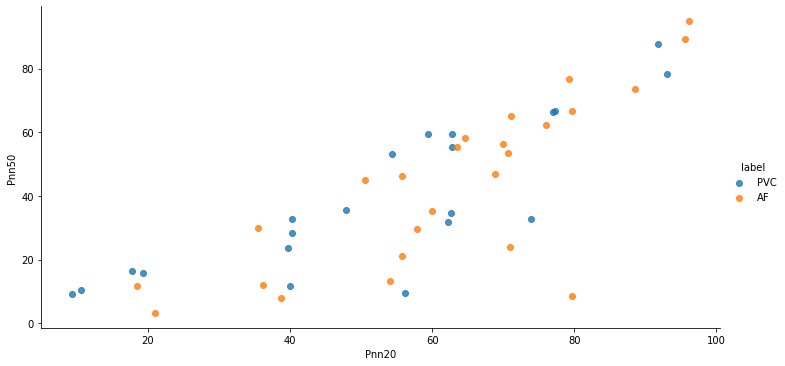

In [67]:
import seaborn as sns
sns.lmplot('Pnn20', # Horizontal axis
           'Pnn50', # Vertical axis
           hue = 'label',
           data = dropped_nsr, # Data source
           fit_reg = False, # Don't fix a regression line
           aspect = 2 ) # size and dimension

In [68]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3)

In [69]:
counter = 0
akurasitotal =0
for i in range(0,10):
    mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=10000)
    mlp.fit(x_train,y_train)
    pred=mlp.predict(x_test)
    akurasi=mlp.score(x_test,y_test)*100
    print(f"akurasi PVC vs AF: {akurasi:0.2f} %")
    counter+=1
    akurasitotal += akurasi
akurasirata= akurasitotal/counter
print()
print(f'akurasi rata2 PVC vs AF: {akurasirata:0.2f}%')

akurasi PVC vs AF: 50.00 %
akurasi PVC vs AF: 42.86 %
akurasi PVC vs AF: 35.71 %
akurasi PVC vs AF: 50.00 %
akurasi PVC vs AF: 57.14 %
akurasi PVC vs AF: 35.71 %
akurasi PVC vs AF: 57.14 %
akurasi PVC vs AF: 42.86 %
akurasi PVC vs AF: 50.00 %
akurasi PVC vs AF: 35.71 %

akurasi rata2 PVC vs AF: 45.71%


## NSR vs PVC vs AF

In [72]:
x=np.array(dataset.drop(['label','HR','SDNN','RMSSD','label','dataset','Unnamed: 7','Unnamed: 8'], axis=1))
y=np.array(dataset['label'])

C:\Users\hafid\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


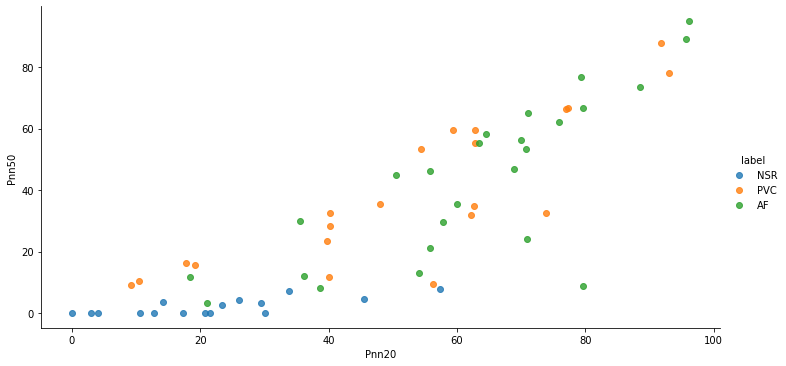

In [73]:
import seaborn as sns
sns.lmplot('Pnn20', # Horizontal axis
           'Pnn50', # Vertical axis
           hue = 'label',
           data = dataset, # Data source
           fit_reg = False, # Don't fix a regression line
           aspect = 2 ) # size and dimension

In [74]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3)

In [77]:
counter = 0
akurasitotal =0
for i in range(0,10):
    mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=10000)
    mlp.fit(x_train,y_train)
    pred=mlp.predict(x_test)
    akurasi=mlp.score(x_test,y_test)*100
    print(f"akurasi NSR vs PVC vs AF: {akurasi:0.2f} %")
    counter+=1
    akurasitotal += akurasi
akurasirata= akurasitotal/counter
print()
print(f'akurasi rata2 NSR vs PVC vs AF: {akurasirata:0.2f}%')

akurasi NSR vs PVC vs AF: 52.63 %
akurasi NSR vs PVC vs AF: 42.11 %
akurasi NSR vs PVC vs AF: 52.63 %
akurasi NSR vs PVC vs AF: 42.11 %
akurasi NSR vs PVC vs AF: 42.11 %
akurasi NSR vs PVC vs AF: 36.84 %
akurasi NSR vs PVC vs AF: 52.63 %
akurasi NSR vs PVC vs AF: 36.84 %
akurasi NSR vs PVC vs AF: 42.11 %
akurasi NSR vs PVC vs AF: 42.11 %

akurasi rata2 NSR vs PVC vs AF: 44.21%
